In [13]:
from google.colab import files
files.upload()

Saving orders.csv to orders (3).csv
Saving restaurants.sql to restaurants (1).sql
Saving users.json to users (1).json


{'orders (3).csv': b'order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name\r\n1,2508,450,18-02-2023,842.97,New Foods Chinese\r\n2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine\r\n3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi\r\n4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg\r\n5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian\r\n6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian\r\n7,970,35,30-05-2023,129.21,Royal Biryani North Indian\r\n8,891,57,07-11-2023,269.19,Spice Mess Punjabi\r\n9,364,7,05-12-2023,953.3,Ruchi Biryani Punjabi\r\n10,2972,183,30-12-2023,351.41,Taste of Biryani Non-Veg\r\n11,924,235,10-12-2023,523.82,Amma Delights Family Restaurant\r\n12,884,423,27-10-2023,1484.65,Royal Tiffins Multicuisine\r\n13,1958,244,11-08-2023,216.59,Amma Tiffins South Indian\r\n14,364,112,24-09-2023,898.24,Grand Cafe Punjabi\r\n15,1733,383,17-07-2023,1098.41,Amma Biryani North Indian\r\n16,1321,149,17-07-2023,475.74,Amma Restaurant South 

In [14]:
import pandas as pd

orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [15]:
import json

with open('users.json') as f:
    users_data = json.load(f)

users = pd.DataFrame(users_data)
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [16]:
import sqlite3

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

with open('restaurants.sql') as f:
    cursor.executescript(f.read())

restaurants = pd.read_sql('SELECT * FROM restaurants', conn)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


Joins


In [17]:
orders_users = orders.merge(
    users,
    on='user_id',
    how='left'
)

In [18]:
final_df = orders_users.merge(
    restaurants,
    on='restaurant_id',
    how='left'
)

Final Dataset Creation

In [19]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [21]:
final_df.to_csv('final_food_delivery_dataset.csv', index=False)

In [22]:
files.download('final_food_delivery_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Students must analyze:

In [23]:
from google.colab import files
files.upload()

Saving final_food_delivery_dataset.csv to final_food_delivery_dataset (1).csv


{'final_food_delivery_dataset (1).csv': b'order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating\n1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2\n2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5\n3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0\n4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8\n5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0\n6,2933,499,12-07-2023,1497.22,Annapurna Tiffins South Indian,User_2933,Chennai,Regular,Restaurant_499,Mexican,4.9\n7,970,35,30-05-2023,129.21,Royal Biryani North Indian,User_970,Bangalore,Regular,Restaurant_35,Chinese,3.9\n8,891,57,07-11-2023,269.19,Spice Mess Punjabi,User_891,Pune,Regular,Restaurant_57

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final_food_delivery_dataset.csv')

# Convert date column
df['order_date'] = pd.to_datetime(df['order_date'])

df.head()

/tmp/ipython-input-2038006479.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


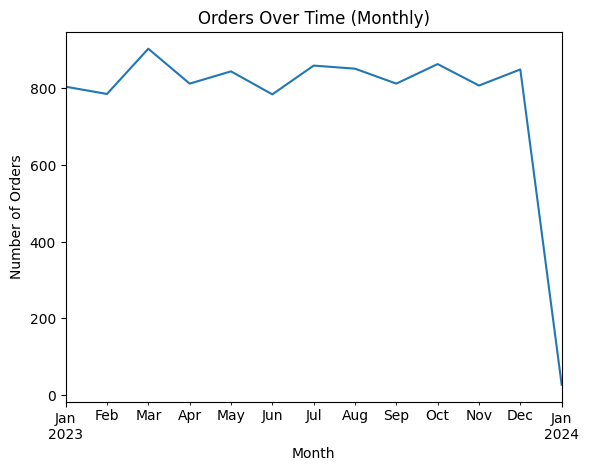

In [27]:
#1
orders_over_time = df.groupby(df['order_date'].dt.to_period('M')).size()

orders_over_time.plot(kind='line')
plt.title("Orders Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

In [29]:
#2
orders_per_user = df.groupby('user_id')['order_id'].count()

orders_per_user.describe()

,order_id
count,2883.000000
mean,3.468609
std,1.792682
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,13.000000


In [31]:
#2
avg_order_value = df.groupby('user_id')['total_amount'].mean()

avg_order_value.head()

,total_amount
user_id,
1,1289.660
2,756.412
3,919.755
4,935.290
5,1148.576


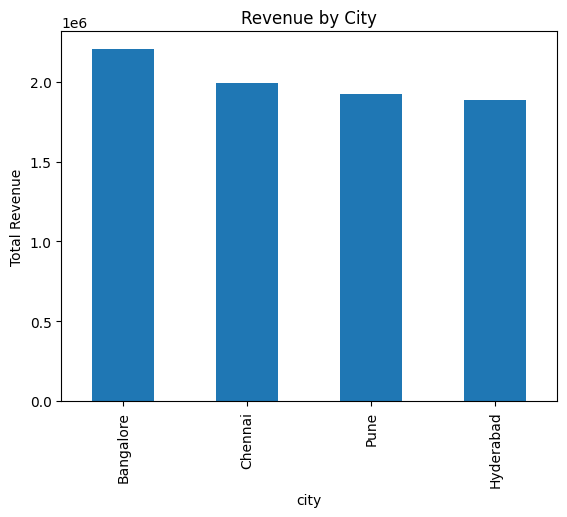

In [34]:
#3
city_revenue = df.groupby('city')['total_amount'].sum().sort_values(ascending=False)

city_revenue.plot(kind='bar')
plt.title("Revenue by City")
plt.ylabel("Total Revenue")
plt.show()

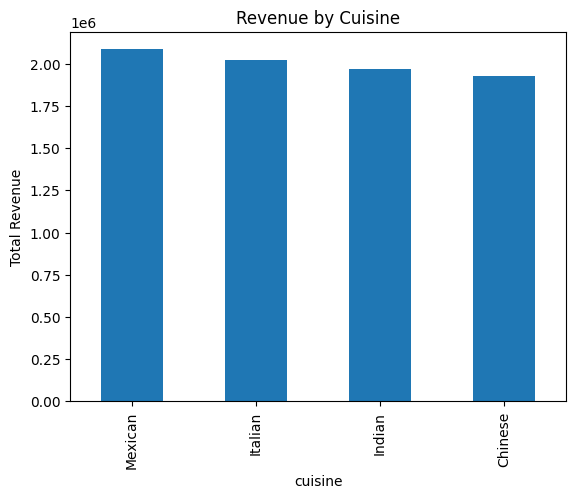

In [35]:
cuisine_revenue = df.groupby('cuisine')['total_amount'].sum().sort_values(ascending=False)

cuisine_revenue.plot(kind='bar')
plt.title("Revenue by Cuisine")
plt.ylabel("Total Revenue")
plt.show()

In [37]:
#4
membership_orders = df.groupby('membership')['order_id'].count()
membership_orders

,order_id
membership,
Gold,4987
Regular,5013


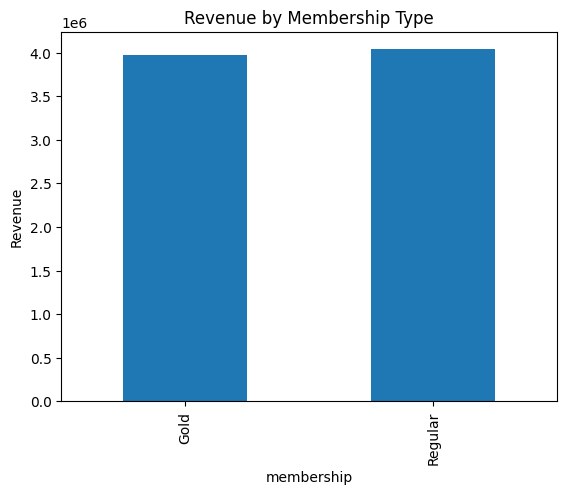

In [39]:
#4
membership_revenue = df.groupby('membership')['total_amount'].sum()

membership_revenue.plot(kind='bar')
plt.title("Revenue by Membership Type")
plt.ylabel("Revenue")
plt.show()

In [42]:
#4
df.groupby('membership')['total_amount'].mean()

,total_amount
membership,
Gold,797.145556
Regular,805.158434


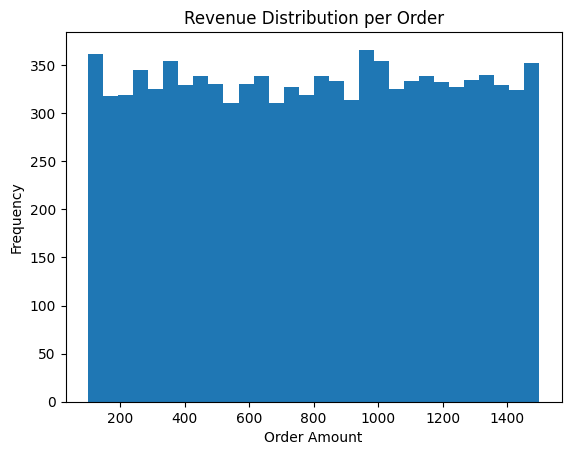

In [44]:
#5
df['total_amount'].plot(kind='hist', bins=30)
plt.title("Revenue Distribution per Order")
plt.xlabel("Order Amount")
plt.show()

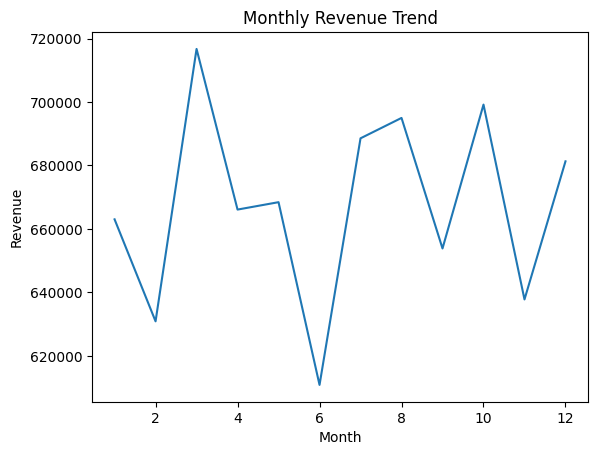

In [45]:
#5
monthly_revenue = df.groupby(df['order_date'].dt.month)['total_amount'].sum()

monthly_revenue.plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

Insights

In [47]:
#1
df[df['membership'] == 'Gold'] \
  .groupby('city')['total_amount'] \
  .sum() \
  .loc[['Hyderabad', 'Bangalore', 'Chennai', 'Pune']] \
  .sort_values(ascending=False)

,total_amount
city,
Chennai,1080909.79
Pune,1003012.32
Bangalore,994702.59
Hyderabad,896740.19


In [48]:
#2
df.groupby('cuisine')['total_amount'] \
  .mean() \
  .loc[['Indian', 'Chinese', 'Italian', 'Mexican']] \
  .sort_values(ascending=False)

,total_amount
cuisine,
Mexican,808.021344
Italian,799.448578
Indian,798.466011
Chinese,798.389020


In [49]:
#3
(df.groupby('user_id')['total_amount']
   .sum()
   .gt(1000)
   .sum())

np.int64(2544)

In [50]:
#4
pd.cut(
    df['rating'],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=['3.0–3.5', '3.6–4.0', '4.1–4.5', '4.6–5.0'],
    include_lowest=True
).to_frame('rating_range') \
 .join(df['total_amount']) \
 .groupby('rating_range')['total_amount'] \
 .sum() \
 .sort_values(ascending=False)

/tmp/ipython-input-2049028418.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating_range')['total_amount'] \


,total_amount
rating_range,
4.6–5.0,2197030.75
3.0–3.5,2136772.70
4.1–4.5,1960326.26
3.6–4.0,1717494.41


In [52]:
#5
df[df['membership'] == 'Gold'] \
  .groupby('city')['total_amount'] \
  .mean() \
  .loc[['Hyderabad', 'Bangalore', 'Chennai', 'Pune']] \
  .sort_values(ascending=False)

,total_amount
city,
Chennai,808.459080
Hyderabad,806.421034
Bangalore,793.223756
Pune,781.162243


In [53]:
#6
df.groupby('cuisine').agg(
    distinct_restaurants=('restaurant_id', 'nunique'),
    total_revenue=('total_amount', 'sum')
).loc[['Indian', 'Chinese', 'Italian', 'Mexican']] \
 .sort_values(['distinct_restaurants', 'total_revenue'], ascending=[True, False])

,distinct_restaurants,total_revenue
cuisine,,
Chinese,120,1930504.65
Italian,126,2024203.80
Indian,126,1971412.58
Mexican,128,2085503.09


In [57]:
#7
round(
    (df[df['membership'] == 'Gold'].shape[0] / df.shape[0]) * 100
)

50

In [63]:
#8
allowed_restaurants = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess MultiCuisine",
    "Ruchi Foods Chinese"
]

# Filter dataset to only these restaurants
filtered_df = df[df['restaurant_name_x'].isin(allowed_restaurants)]

rest_stats = filtered_df.groupby('restaurant_name_x').agg(
    avg_order_value=('total_amount', 'mean'),
    total_orders=('order_id', 'count')
)

rest_stats[
    rest_stats['total_orders'] < 20
].sort_values(
    by='avg_order_value',
    ascending=False
).head()

,avg_order_value,total_orders
restaurant_name_x,,
Ruchi Foods Chinese,686.603158,19


In [65]:
#9
combo_rev = (
    df.groupby(['cuisine', 'membership'])['total_amount']
    .sum()
    .sort_values(ascending=False)
)

combo_rev.head(5)

,,total_amount
cuisine,membership,
Mexican,Regular,1072943.30
Italian,Regular,1018424.75
Mexican,Gold,1012559.79
Italian,Gold,1005779.05
Indian,Regular,992100.27


In [67]:
#10
df['quarter'] = df['order_date'].dt.to_period('Q')

quarterly_revenue = (
    df.groupby('quarter')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

quarterly_revenue.head(1)

,total_amount
quarter,
2023Q3,2037385.1


In [68]:
#11
df[df['membership'] == 'Gold'].shape[0]

4987

In [69]:
#12
round(df[df['city'] == 'Hyderabad']['total_amount'].sum())

1889367

In [70]:
#13
df['user_id'].nunique()

2883

In [71]:
#14
round(df[df['membership'] == 'Gold']['total_amount'].mean(), 2)

np.float64(797.15)

In [72]:
#15
df[df['rating'] >= 4.5].shape[0]

3374

In [74]:
#16
gold_df = df[df['membership'] == 'Gold']
top_city = gold_df.groupby('city')['total_amount'].sum().idxmax()
gold_df[gold_df['city'] == top_city].shape[0]

1337